# Principal Component Analysis (PCA)

## Exercício 01

Implemente o PCA em C / C++ / Java / Python.<br>
- PCA com 2 componentes.<br>
- Teste o funcionamento usando:<br>
“Alps Water”;<br>
“US Census Dataset”.<br>

### Definição das funções

In [1]:
#Definição da biblioteca pandas para importar o dataset
import pandas as pd

#Definição da biblioteca numpy para calculo dos auto-valores
import numpy as np

#### Dataset - Subtração da média

In [2]:
#Subtraindo a média para definição do novo Dataset:

#Cálculo da média:
def calculo_mean(x):
    soma=[]
    soma_i = 0
    for i in range(len(x)):
        soma_i= soma_i + x[i]
        media = (soma_i)/len(x)
    return media


def subtract_mean(x,y,z=0):
    new_X = [i - calculo_mean(x) for i in x]
    new_Y = [i - calculo_mean(y) for i in y]
    
    if z==0:
    #Defining dataset after subtract mean:
        dataset2=[[i,j] for i, j in zip(new_X, new_Y)]
        return dataset2
    
    else:
        new_Z = [i - calculo_mean(z) for i in z]
        dataset3=[[i,j,z] for i, j, z in zip(new_X, new_Y,new_Z)]
        return dataset3

#### Cálculo da matriz de covariância

In [3]:
#Cálculo da matriz de covariância
def cov_matrix(dataset):
    if len(dataset[0])==2:
        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][0]*dataset[i][1]
            diag_cov_element = soma/(len(dataset)-1)
        diag_cov_element

        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][0]*dataset[i][0]
            first_cov_element = soma/(len(dataset)-1)
        first_cov_element

        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][1]*dataset[i][1]
            last_cov_element = soma/(len(dataset)-1)
        last_cov_element

        covariance_matrix = [[first_cov_element,diag_cov_element],[diag_cov_element,last_cov_element]]
        return covariance_matrix
    
    if len(dataset[0])==3:
        #cov(x,x)
        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][0]*dataset[i][0]
            cov_x_x = soma/(len(dataset)-1)

        #cov(y,y)
        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][1]*dataset[i][1]
            cov_y_y = soma/(len(dataset)-1)

        #cov(z,z)
        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][2]*dataset[i][2]
            cov_z_z = soma/(len(dataset)-1)

        #cov(x,y) = cov(y,x)
        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][0]*dataset[i][1]
            cov_x_y = soma/(len(dataset)-1)


        #cov(x,z) = cov(z,x)
        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][0]*dataset[i][2]
            cov_x_z = soma/(len(dataset)-1)

        #cov(y,z) = cov(z,y)
        soma=0
        for i in range(len(dataset)):
            soma = soma + dataset[i][1]*dataset[i][2]
            cov_y_z = soma/(len(dataset)-1)


        covariance_matrix = [[cov_x_x,cov_x_y,cov_x_z],
                            [cov_x_y,cov_y_y,cov_y_z],
                            [cov_x_z,cov_y_z,cov_z_z]]
        return covariance_matrix

#### Cálculo da matriz transposta

In [4]:
#Função para calcular a matriz transposta:

def transposta(X):
    """Retorna a transposta da matriz de entrada"""
    return [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))] 

#### Multiplicação de duas matrizes

In [5]:
#Multiplicação de duas matrizes:

def multiply_matrix_matrix(mult1,mult2):
    """Retorna o produto escalar de duas matrizes"""
    x = []
    for i in range(0,len(mult1)):
        y=[]
        for j in range(0,len(mult2[0])):
            total = 0
            for k in range(0,len(mult1[0])):
                total = total + mult1[i][k]*mult2[k][j]
            y.append(total)
        x.append(y)

    return x

### Alps Water

In [6]:
#1° Passo - Pegar os dados / Importar o dataset
alps_water = pd.read_csv('DataSets/alpswater1.txt',sep='\t',header=None)
alps_water.columns= ['Row','Pressure','Boiling']
alps_water.drop(columns='Row', inplace=True)
alps_water.head()

,Pressure,Boiling
0,20.79,194.5
1,20.79,194.3
2,22.40,197.9
3,22.67,198.4
4,23.15,199.4


In [7]:
# 1° Passo - Transformando as entradas em listas
x_alps = [i for i in alps_water['Boiling']]
y_alps = [i for i in alps_water['Pressure']]

#Defining dataset to apply PCA
dataset_alps=[[i,j] for i, j in zip(x_alps, y_alps)]
dataset_alps

[[194.5, 20.79],
 [194.3, 20.79],
 [197.9, 22.4],
 [198.4, 22.67],
 [199.4, 23.15],
 [199.9, 23.35],
 [200.9, 23.89],
 [201.1, 23.99],
 [201.4, 24.02],
 [201.3, 24.01],
 [203.6, 25.14],
 [204.6, 26.57],
 [209.5, 28.49],
 [208.6, 27.76],
 [210.7, 29.04],
 [211.9, 29.88],
 [212.2, 30.06]]

In [8]:
#2° Passo - Subtraindo a média
new_dataset_alps = subtract_mean(x_alps,y_alps)
new_dataset_alps

[[-8.452941176470574, -4.268823529411769],
 [-8.652941176470563, -4.268823529411769],
 [-5.0529411764705685, -2.6588235294117695],
 [-4.5529411764705685, -2.3888235294117663],
 [-3.5529411764705685, -1.9088235294117695],
 [-3.0529411764705685, -1.7088235294117666],
 [-2.0529411764705685, -1.1688235294117675],
 [-1.8529411764705799, -1.0688235294117696],
 [-1.5529411764705685, -1.0388235294117685],
 [-1.6529411764705628, -1.0488235294117665],
 [0.6470588235294201, 0.08117647058823252],
 [1.6470588235294201, 1.5111764705882322],
 [6.547058823529426, 3.4311764705882304],
 [5.64705882352942, 2.7011764705882335],
 [7.747058823529414, 3.981176470588231],
 [8.947058823529431, 4.821176470588231],
 [9.247058823529414, 5.001176470588231]]

In [9]:
#3° Passo - Cálculo da matriz de covariância
covariance_matrix_alps = cov_matrix(new_dataset_alps)
covariance_matrix_alps

[[33.17389705882348, 17.346378676470575],
 [17.346378676470575, 9.121111029411763]]

In [10]:
#4° Passo - Encontrar os autovalores, checar se estão na ordem
autovalores_alps = np.linalg.eig(covariance_matrix_alps)[0]
autovalores_alps

array([4.22551089e+01, 3.98992029e-02])

In [11]:
#4° Passo - Encontrar os autovetores
autovetores_alps = np.linalg.eig(covariance_matrix_alps)[1]
autovetores_alps

array([[ 0.88593619, -0.46380714],
       [ 0.46380714,  0.88593619]])

In [12]:
#5° Passo - Escolher os componentes
FeatureVector = autovetores_alps
FeatureVector 

array([[ 0.88593619, -0.46380714],
       [ 0.46380714,  0.88593619]])

In [13]:
#6° Passo - Derive the new 
#Multiplicar os autovetores pela matriz após subtração da média:
#Conferir resultado :
#np.matmul(pca.components_,transposta(new_dataset_alps))
pca_alps = multiply_matrix_matrix(transposta(FeatureVector),transposta(new_dataset_alps))
pca_alps

#Organizando a resposta
pca_alps_answer = [[pca_alps[0][i],pca_alps[1][i]] for i in range(len(pca_alps[0]))]
pca_alps_answer

[[-9.46867735263238, 0.13862918119196577],
 [-9.64586459136409, 0.23139060868544403],
 [-5.709764802870609, -0.011957814406917233],
 [-5.141568778925107, -0.004658610852802614],
 [-4.033005159282153, -0.043216375364096615],
 [-3.4972756349593705, -0.0979327053660839],
 [-2.3608835870683698, -0.0833342982578602],
 [-2.1373156345899202, -0.08750210638548084],
 [-1.8576205623683082, -0.2000661618159525],
 [-1.9508522531088361, -0.16254481000579746],
 [0.6109030576440994, -0.22819332734663744],
 [2.1600834578811017, 0.5748882921177365],
 [7.3916805107456645, 0.003230810351890767],
 [6.2557587261017105, -0.22607618729820267],
 [8.709897868743049, -0.0660728480967765],
 [10.162619296606008, 0.1215449896155345],
 [10.511885439447706, 0.1418713632338635]]

In [14]:
#Checando a resposta
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(dataset_alps)
pca.explained_variance_ratio_
pca.singular_values_
Transformed_X = pca.transform(dataset_alps)
Transformed_X

array([[-9.46867735e+00,  1.38629181e-01],
       [-9.64586459e+00,  2.31390609e-01],
       [-5.70976480e+00, -1.19578144e-02],
       [-5.14156878e+00, -4.65861085e-03],
       [-4.03300516e+00, -4.32163754e-02],
       [-3.49727563e+00, -9.79327054e-02],
       [-2.36088359e+00, -8.33342983e-02],
       [-2.13731563e+00, -8.75021064e-02],
       [-1.85762056e+00, -2.00066162e-01],
       [-1.95085225e+00, -1.62544810e-01],
       [ 6.10903058e-01, -2.28193327e-01],
       [ 2.16008346e+00,  5.74888292e-01],
       [ 7.39168051e+00,  3.23081035e-03],
       [ 6.25575873e+00, -2.26076187e-01],
       [ 8.70989787e+00, -6.60728481e-02],
       [ 1.01626193e+01,  1.21544990e-01],
       [ 1.05118854e+01,  1.41871363e-01]])

### US Census Dataset

In [15]:
#1° Passo - Pegar os dados / Importar o dataset
us_census = pd.read_csv('DataSets/US-Census.txt', sep='\t', header=None)
us_census.columns = ['x','y'] #atribuição de nomes às colunas
us_census 

,x,y
0,1900,75.995
1,1910,91.972
2,1920,105.711
3,1930,123.203
4,1940,131.669
5,1950,150.697
6,1960,179.323
7,1970,203.212
8,1980,226.505
9,1990,249.633


In [16]:
# 1° Passo - Transformando as entradas em listas
x_us = [i for i in us_census['x']]
y_us = [i for i in us_census['y']]
dataset_us = [[i,j] for i,j in zip(y_us,x_us)]
dataset_us

[[75.995, 1900],
 [91.972, 1910],
 [105.711, 1920],
 [123.203, 1930],
 [131.669, 1940],
 [150.697, 1950],
 [179.323, 1960],
 [203.212, 1970],
 [226.505, 1980],
 [249.633, 1990],
 [281.422, 2000]]

In [17]:
#2° Passo - Subtraindo a média
new_dataset_us = subtract_mean(y_us,x_us)
new_dataset_us

[[-89.39972727272726, -50.0],
 [-73.42272727272727, -40.0],
 [-59.68372727272727, -30.0],
 [-42.19172727272726, -20.0],
 [-33.725727272727255, -10.0],
 [-14.697727272727263, 0.0],
 [13.928272727272741, 10.0],
 [37.81727272727272, 20.0],
 [61.11027272727273, 30.0],
 [84.23827272727274, 40.0],
 [116.02727272727276, 50.0]]

In [18]:
#3° Passo - Cálculo da matriz de covariância
covariance_matrix_us = cov_matrix(new_dataset_us)
covariance_matrix_us

[[4599.596807418182, 2227.833], [2227.833, 1100.0]]

In [19]:
#4° Passo - Encontrar os autovalores
autovalores_us = np.linalg.eig(covariance_matrix_us)[0]
autovalores_us

array([5682.64755774,   16.94924967])

In [20]:
#4° Passo - Encontrar os autovetores
autovetores_us = np.linalg.eig(covariance_matrix_us)[1]
autovetores_us

array([[ 0.89935573, -0.43721765],
       [ 0.43721765,  0.89935573]])

In [21]:
#5° Passo - Escolher os componentes
FeatureVector_us = autovetores_us

In [22]:
#6° Passo - Derive the new dataset
pca_us = multiply_matrix_matrix(transposta(FeatureVector_us),transposta(new_dataset_us))
pca_us

#Organizando a resposta
pca_us_answer = [[pca_us[0][i],pca_us[1][i]] for i in range(len(pca_us[0]))]
pca_us_answer

[[-102.26303932718267, -5.880648264018603],
 [-83.52185636156509, -3.8725172799329215],
 [-66.79343152132931, -0.8858932050646011],
 [-46.68972462365029, 0.45985304598454846],
 [-34.70360255157288, 5.751925765936422],
 [-13.218485251487028, 6.426105713392109],
 [16.898648352180082, 2.903870698679783],
 [42.75553385936203, 1.4527356710262147],
 [68.07640335102677, 0.2621823601315576],
 [93.24887914712045, -0.8562300392442808],
 [126.21067492709801, -5.761384466890277]]

In [23]:
#Checando a resposta
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(dataset_us)
pca.explained_variance_ratio_
pca.singular_values_
Transformed_X = pca.transform(dataset_us)
Transformed_X

array([[-102.26303933,   -5.88064826],
       [ -83.52185636,   -3.87251728],
       [ -66.79343152,   -0.88589321],
       [ -46.68972462,    0.45985305],
       [ -34.70360255,    5.75192577],
       [ -13.21848525,    6.42610571],
       [  16.89864835,    2.9038707 ],
       [  42.75553386,    1.45273567],
       [  68.07640335,    0.26218236],
       [  93.24887915,   -0.85623004],
       [ 126.21067493,   -5.76138447]])

## Exercício 02

Implemente o PCA em C / C++ / Java Python.<br>
- PCA com 3 componentes<br>
- Pode usar um solucionador para os autovalores:`numpy.linalg.eig`<br>
- Teste o funcionamento usando: “Books x Grades”<br>

### Books x Grades

In [24]:
#1° Passo - Pegar os dados / Importar o dataset
books_attend_grade = pd.read_csv('DataSets/Books_attend_grade.txt',sep='\t',header=None)
books_attend_grade.columns=['Books', 'Attend', 'Grade']
books_attend_grade.head()

,Books,Attend,Grade
0,0,9,45
1,1,15,57
2,0,10,45
3,2,16,51
4,4,10,65


In [25]:
#1° Passo - Transformando as features em linhas
books = [i for i in books_attend_grade['Books']]
attend = [i for i in books_attend_grade['Attend']]
grade = [i for i in books_attend_grade['Grade']]
dataset_books=[[i,j,k] for i, j, k in zip(books,attend,grade)]

In [26]:
#2° Passo - Subtraindo a média
new_dataset_books = subtract_mean(x=books,y=attend,z=grade)
new_dataset_books

[[-2.0, -5.1, -18.549999999999997],
 [-1.0, 0.9000000000000004, -6.549999999999997],
 [-2.0, -4.1, -18.549999999999997],
 [0.0, 1.9000000000000004, -12.549999999999997],
 [2.0, -4.1, 1.4500000000000028],
 [2.0, 5.9, 24.450000000000003],
 [-1.0, -3.0999999999999996, -19.549999999999997],
 [2.0, 5.9, 23.450000000000003],
 [1.0, 0.9000000000000004, 25.450000000000003],
 [-2.0, 0.9000000000000004, -4.549999999999997],
 [0.0, -6.1, 2.450000000000003],
 [-1.0, -1.0999999999999996, 1.4500000000000028],
 [2.0, 3.9000000000000004, -7.549999999999997],
 [-1.0, -4.1, -16.549999999999997],
 [-2.0, -6.1, 2.450000000000003],
 [-1.0, -4.1, -22.549999999999997],
 [1.0, 1.9000000000000004, -7.549999999999997],
 [-2.0, -3.0999999999999996, -26.549999999999997],
 [-1.0, 4.9, -18.549999999999997],
 [2.0, -2.0999999999999996, -5.549999999999997],
 [2.0, -3.0999999999999996, -16.549999999999997],
 [-2.0, 4.9, 0.45000000000000284],
 [0.0, 0.9000000000000004, 33.45],
 [1.0, 0.9000000000000004, -8.549999999999

In [27]:
#3° Passo - Cálculo da matriz de covariância
covariance_matrix_books = cov_matrix(new_dataset_books)

In [28]:
#4° Passo - Encontrar os autovalores
autovalores_books = np.linalg.eig(covariance_matrix_books)[0]
autovalores_books

array([284.06269633,   1.42686491,  13.93351568])

In [29]:
#Ordenando os autovalores
autovalores_books_order=[autovalores_books[0],autovalores_books[2],autovalores_books[1]]
autovalores_books_order

[284.0626963267395, 13.933515683763172, 1.4268649125743447]

In [30]:
#4° Passo - Encontrar os autovetores
autovetores_books = np.linalg.eig(covariance_matrix_books)[1]
autovetores_books

#Organizando, de acordo com a ordem dos autovetores
autovetores_books_order=[[autovetores_books[0][0],autovetores_books[0][2],autovetores_books[0][1]],
                         [autovetores_books[1][0],autovetores_books[1][2],autovetores_books[1][1]],
                         [autovetores_books[2][0],autovetores_books[2][2],autovetores_books[2][1]]]
autovetores_books_order

[[0.04258907363470934, -0.09453235761511249, 0.9946103780730755],
 [0.12888537417015916, -0.9866755578201922, -0.09929704892508402],
 [0.9907445337381152, 0.13241970005985104, -0.029837759703160948]]

In [31]:
#5° Passo - Escolher os componentes
Feature = autovetores_books_order
Feature 

[[0.04258907363470934, -0.09453235761511249, 0.9946103780730755],
 [0.12888537417015916, -0.9866755578201922, -0.09929704892508402],
 [0.9907445337381152, 0.13241970005985104, -0.029837759703160948]]

In [32]:
#6° Passo - Derive the new dataset
pca_books = multiply_matrix_matrix(transposta(Feature),transposta(new_dataset_books))
pca_books_answer = [[pca_books[0][i],pca_books[1][i],pca_books[2][i]] for i in range(len(pca_books[0]))]
pca_books_answer

[[-19.120804656379264, 2.764724624002969, -0.929315364134587],
 [-6.415968932866218, -1.6608246798150847, -0.8885403960499472],
 [-18.991919282209103, 1.7780490661827764, -1.028612413059671],
 [-12.18896168749004, -3.5365507956094957, 0.18579949131701012],
 [0.993327687092036, 4.048313636919347, 2.353073905169412],
 [25.06930570477028, -2.772788839906002, 0.6738349427458701],
 [-19.81118936814235, 0.5644214506876208, -0.10346132420851861],
 [24.078561171032163, -2.905208539965853, 0.703672702449031],
 [25.373034294022887, 2.387541006869924, 0.14587204959505362],
 [-4.477068939024697, -1.3014529220802702, -1.9428262935293443],
 [1.641123325220414, 6.343149167849807, 0.5326094871702681],
 [1.2522165886983854, 1.371884036304108, -0.9286483758250665],
 [-6.892290123189728, -5.03686812618085, 1.8272373510971882],
 [-16.967841141098166, 1.9483561086873658, -0.09367755439291742],
 [1.5559451779509954, 6.532213883080033, -1.4566112689758828],
 [-22.912308343526856, 1.1538379083282595, 0.085349

In [33]:
#Checando a resposta
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(dataset_books)
pca.explained_variance_ratio_
pca.singular_values_
Transformed_X = pca.transform(dataset_books)
Transformed_X

array([[-1.91208047e+01,  2.76472462e+00, -9.29315364e-01],
       [-6.41596893e+00, -1.66082468e+00, -8.88540396e-01],
       [-1.89919193e+01,  1.77804907e+00, -1.02861241e+00],
       [-1.21889617e+01, -3.53655080e+00,  1.85799491e-01],
       [ 9.93327687e-01,  4.04831364e+00,  2.35307391e+00],
       [ 2.50693057e+01, -2.77278884e+00,  6.73834943e-01],
       [-1.98111894e+01,  5.64421451e-01, -1.03461324e-01],
       [ 2.40785612e+01, -2.90520854e+00,  7.03672702e-01],
       [ 2.53730343e+01,  2.38754101e+00,  1.45872050e-01],
       [-4.47706894e+00, -1.30145292e+00, -1.94282629e+00],
       [ 1.64112333e+00,  6.34314917e+00,  5.32609487e-01],
       [ 1.25221659e+00,  1.37188404e+00, -9.28648376e-01],
       [-6.89229012e+00, -5.03686813e+00,  1.82723735e+00],
       [-1.69678411e+01,  1.94835611e+00, -9.36775544e-02],
       [ 1.55594518e+00,  6.53221388e+00, -1.45661127e+00],
       [-2.29123083e+01,  1.15383791e+00,  8.53490038e-02],
       [-7.19264995e+00, -2.96898465e+00

## Exercício 03

Compare PCA com o método dos mínimos quadrados.
- Compare a reta gerada pelos mínimos quadrados e a gerada pelo PCA.

### Import Libraries

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

### Alps Water

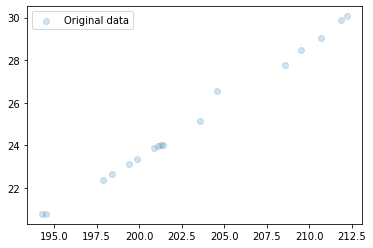

In [35]:
# Plot Original Data
plt.scatter(x_alps, y_alps, alpha=0.2)
plt.legend(['Original data'])

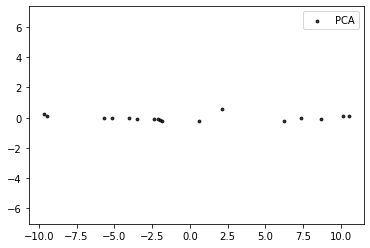

In [101]:
# plot PCA result
df = pd.DataFrame(pca_alps_answer,columns=['0','1'])

plt.scatter(df['0'], df['1'], alpha=0.8, s=8, c='k')
plt.axis('equal');

plt.legend(['PCA'])

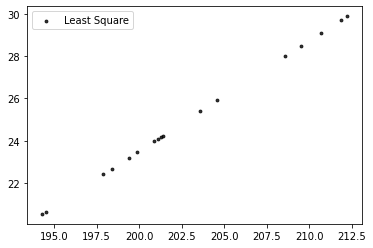

In [100]:
# Plot Least Squares
model = LinearRegression()
X=alps_water[['Boiling']]
y=alps_water['Pressure']
model.fit(X,y)
model.predict(X)

plt.scatter(X, model.predict(X), label='predicted', alpha=0.8, s=8, c='k')

plt.legend(['Least Square'])